# prepare dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv');df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
%%capture
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [6]:
from pandas_profiling import ProfileReport

In [7]:
profile = ProfileReport(df, title='Loan information')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# EDA

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Target distribution')

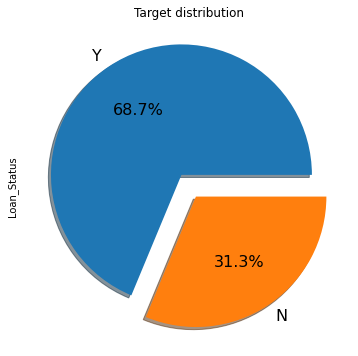

In [9]:
# Figure size
plt.figure(figsize=(6,6))

# Pie plot
df['Loan_Status'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution")

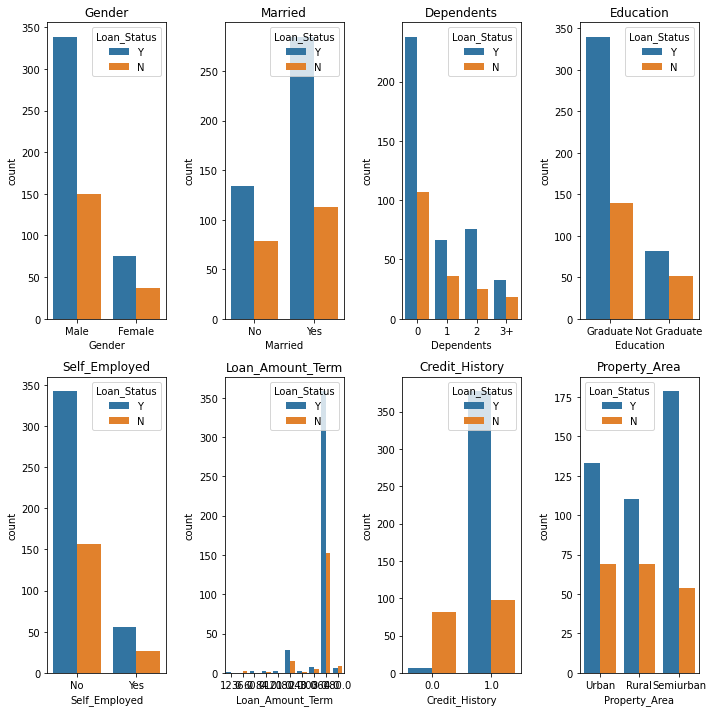

In [10]:
cat_feats = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
fig=plt.figure(figsize=(10,10))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(2,4,i+1)
    sns.countplot(data=df, x=var_name, axes=ax, hue='Loan_Status')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


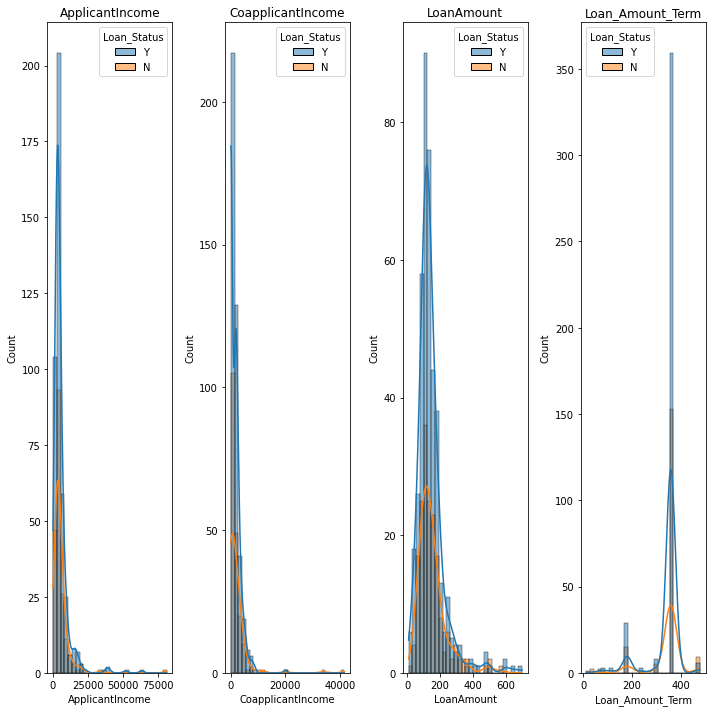

In [12]:
con_feats=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
fig=plt.figure(figsize=(10,10))
for i, var_name in enumerate(con_feats):
    # Right plot (truncated)
    ax=fig.add_subplot(1,4,i + 1)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=True, hue='Loan_Status')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

In [13]:
dtset = df.copy();dtset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# imputation

In [14]:
dtset[dtset.select_dtypes('float').columns] = dtset.select_dtypes('float').apply(lambda x: x.fillna(round(x.mean(), 1)), axis= 0)
dtset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
dtset['Gender'].fillna(dtset['Gender'].value_counts().index[0], inplace=True)
dtset['Married'].fillna(dtset['Married'].value_counts().index[0], inplace=True)
dtset['Dependents'].fillna(dtset['Dependents'].value_counts().index[0], inplace=True)
dtset['Self_Employed'].fillna(dtset['Self_Employed'].value_counts().index[0], inplace=True);dtset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Feature engineering

In [16]:
dtset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.4,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
dtset['new_col'] = dtset['CoapplicantIncome'] / dtset['ApplicantIncome']
dtset['new_col_2'] = dtset['LoanAmount'] * dtset['Loan_Amount_Term']
#dtset.drop(['X6', 'X7', 'X8', 'X9'], axis=1, inplace=True)
dtset['new_col_2'] = np.log(dtset['new_col_2'])

In [18]:
dtset.drop(['Loan_ID'], axis=1, inplace=True)

In [19]:
threshold = 1.5

new_col_2_out = dtset['new_col_2']
q25, q75 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in new_col_2_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

print('\nlen X_train before dropping the outliers', len(dtset))
dtset = dtset.drop(dtset[(dtset['new_col_2'] > upper) | (dtset['new_col_2'] < lower)].index, axis=0)

print('len X_train before dropping the outliers', len(dtset))

Quartile 25: 10.439980923050696 , Quartile 75: 10.961277846683982
iqr: 0.5212969236332867
Cut Off: 0.7819453854499301
Lower: 9.658035537600766
Upper: 11.743223232133913
Nubers of Outliers: 47
outliers:[7.620705086838262, 9.441452092939569, 8.922658299524402, 9.392661928770137, 8.006367567650246, 11.799607037088427, 12.65075846679162, 8.006367567650246, 9.287301413112312, 9.51044496442652, 12.254862809699606, 9.587406005562649, 12.090661794018846, 9.483416292038601, 8.930626469173578, 9.137769679141348, 8.626944055375356, 9.287301413112312, 11.96374627479919, 9.549665677579801, 12.059890135352092, 9.400630098419315, 11.81569317484005, 12.231740392278752, 8.99961934066053, 11.772208062900312, 9.287301413112312, 11.889991098556695, 9.441452092939569, 12.100712129872347, 9.084777149000837, 7.194436851100335, 12.059890135352092, 9.574983485564092, 9.441452092939569, 12.059890135352092, 11.877568578558138, 7.965545573129992, 9.144200569471638, 12.283033686666302, 8.083328608786376, 9.1129480

# Label Encoder

In [20]:
dtset.select_dtypes('object').columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
for i in dtset.select_dtypes('object').columns:
  dtset[i] = LabelEncoder().fit_transform(dtset[i])

In [23]:
dtset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             567 non-null    int64  
 1   Married            567 non-null    int64  
 2   Dependents         567 non-null    int64  
 3   Education          567 non-null    int64  
 4   Self_Employed      567 non-null    int64  
 5   ApplicantIncome    567 non-null    int64  
 6   CoapplicantIncome  567 non-null    float64
 7   LoanAmount         567 non-null    float64
 8   Loan_Amount_Term   567 non-null    float64
 9   Credit_History     567 non-null    float64
 10  Property_Area      567 non-null    int64  
 11  Loan_Status        567 non-null    int64  
 12  new_col            567 non-null    float64
 13  new_col_2          567 non-null    float64
dtypes: float64(6), int64(8)
memory usage: 66.4 KB


# Standard Scaler

In [24]:
X = dtset.copy()
y = X.pop('Loan_Status')

In [25]:
X.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,new_col,new_col_2
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,0.816578,0.645503,0.719577,0.222222,0.130511,5010.827160,1641.721552,140.971429,350.137566,0.835626,1.026455,0.748868,10.716228
std,0.387353,0.478783,0.995052,0.416107,0.337163,4747.857624,2955.455024,60.327288,48.046379,0.352979,0.784797,4.408242,0.407675
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,44.000000,180.000000,0.000000,0.000000,0.000000,9.670294
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2816.000000,0.000000,104.000000,360.000000,1.000000,0.000000,0.000000,10.476148
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3775.000000,1302.000000,130.000000,360.000000,1.000000,1.000000,0.283620,10.738134
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5699.000000,2318.000000,161.000000,360.000000,1.000000,2.000000,0.757426,10.961278
max,1.000000,1.000000,3.000000,1.000000,1.000000,63337.000000,41667.000000,600.000000,480.000000,1.000000,2.000000,100.161058,11.741176


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
X = pd.DataFrame(StandardScaler().fit_transform(X.astype(float)))

In [28]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,5.670000e+02,5.670000e+02,5.670000e+02,5.670000e+02,5.670000e+02,5.670000e+02,5.670000e+02,5.670000e+02,5.670000e+02,5.670000e+02,5.670000e+02,5.670000e+02,5.670000e+02
mean,-3.916131e-17,3.132904e-17,9.398713e-17,8.145552e-17,-2.349678e-17,-1.723097e-17,4.229421e-17,-2.882272e-16,2.428001e-16,-1.566452e-16,-1.503794e-16,-2.819614e-17,-4.072776e-17
std,1.000883e+00,1.000883e+00,1.000883e+00,1.000883e+00,1.000883e+00,1.000883e+00,1.000883e+00,1.000883e+00,1.000883e+00,1.000883e+00,1.000883e+00,1.000883e+00,1.000883e+00
min,-2.109958e+00,-1.349406e+00,-7.237935e-01,-5.345225e-01,-3.874292e-01,-1.024698e+00,-5.559791e-01,-1.608842e+00,-3.544238e+00,-2.369443e+00,-1.309079e+00,-1.700291e-01,-2.567872e+00
25%,4.739431e-01,-1.349406e+00,-7.237935e-01,-5.345225e-01,-3.874292e-01,-4.626856e-01,-5.559791e-01,-6.133887e-01,2.054503e-01,4.660872e-01,-1.309079e+00,-1.700291e-01,-5.894211e-01
50%,4.739431e-01,7.410670e-01,-7.237935e-01,-5.345225e-01,-3.874292e-01,-2.605214e-01,-1.150488e-01,-1.820257e-01,2.054503e-01,4.660872e-01,-3.373914e-02,-1.056337e-01,5.378191e-02
75%,4.739431e-01,7.410670e-01,2.820666e-01,-5.345225e-01,-3.874292e-01,1.450719e-01,2.290259e-01,3.322917e-01,2.054503e-01,4.660872e-01,1.241601e+00,1.943095e-03,6.016214e-01
max,4.739431e-01,7.410670e-01,2.293787e+00,1.870829e+00,2.581116e+00,1.229558e+01,1.355481e+01,7.615689e+00,2.705242e+00,4.660872e-01,1.241601e+00,2.257135e+01,2.516348e+00


In [29]:
import plotly.express as px

In [30]:
px.imshow(dtset.corr(), text_auto=True, aspect = 'auto', width=1100, height=700).show()

# train test split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Build model

In [33]:
from sklearn.model_selection import cross_val_score

## XGBoost

In [34]:
from xgboost import XGBClassifier

In [35]:
def XGB_train(C):
  return np.mean(cross_val_score(XGBClassifier(n_estimators=C), scoring='f1', X=X, y=y, cv=4, n_jobs=1))

In [36]:
XGB_acc_test = []
for i in range(50, 150):
  XGB_acc_test.append(XGB_train(i))

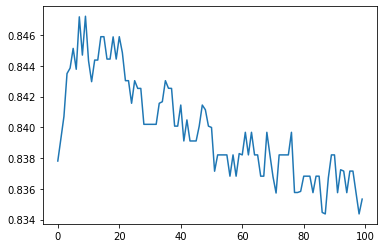

In [37]:
plt.plot(XGB_acc_test)

In [38]:
max(XGB_acc_test)

0.8472231176606033

In [39]:
np.argmax(XGB_acc_test) + 1

10

# Gradient Boosting Classification

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
def GB_train(C):
  return np.mean(cross_val_score(GradientBoostingClassifier(n_estimators=C), scoring='f1', X=X, y=y, cv=4, n_jobs=1))

In [42]:
GB_acc_test = []
for i in range(50, 150):
  GB_acc_test.append(GB_train(i))

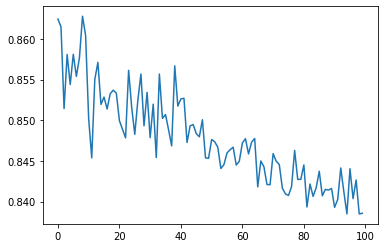

In [43]:
plt.plot(GB_acc_test)

In [44]:
max(GB_acc_test)

0.8627922851453361

In [45]:
np.argmax(GB_acc_test) + 1

9

## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
def LR_train(C):
  return np.mean(cross_val_score(LogisticRegression(C=C), scoring='f1', X=X, y=y, cv=4, n_jobs=1))

In [48]:
LR_acc_test = []
for i in range(1, 200):
  LR_acc_test.append(LR_train(i*0.01))

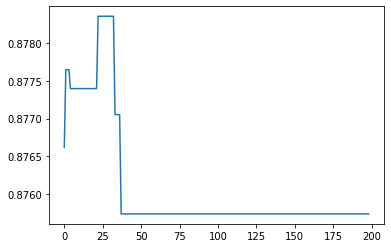

In [49]:
plt.plot(LR_acc_test)

In [50]:
max(LR_acc_test)

0.8783596463569014

In [51]:
np.argmax(LR_acc_test) + 1

23

In [52]:
np.mean(cross_val_score(LogisticRegression(C=0.23), scoring='f1', X=X, y=y, cv=4, n_jobs=1))

0.8783596463569014

In [53]:
model = LogisticRegression(C=0.23).fit(X_train, y_train)

Logistic Regression seems like the best algorithm

# evaluate accuracy

In [54]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [55]:
f1_score(y_test, model.predict(X_test), average='weighted')

0.8213815382636527

In [56]:
accuracy_score(y_test, model.predict(X_test))

0.8380281690140845

In [57]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.50      0.65        42
           1       0.82      0.98      0.89       100

    accuracy                           0.84       142
   macro avg       0.87      0.74      0.77       142
weighted avg       0.85      0.84      0.82       142

